# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Bintang Cahya Anwar
- Email: bintangcanwar@gmail.com
- Id Dicoding: bintangcahya58

## Persiapan

Pada tahap ini, kita akan memuat library yang dibutuhkan untuk analisis data, visualisasi, dan pemodelan, serta mengunduh dan memuat dataset ke dalam lingkungan kerja.

### Menyiapkan library yang dibutuhkan

Pada tahap awal, notebook memuat seluruh library yang dibutuhkan untuk menjelaskan informasi mengenai jumlah data, kondisi data, dan informasi mengenai data yang digunakan.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
import joblib
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

### Menyiapkan data yang akan digunakan

Langkah-langkah berikut digunakan untuk mengambil dan memuat dataset dari Github Dicoding: [Jaya Jaya Institut](https://github.com/dicodingacademy/dicoding_dataset/blob/main/students_performance/data.csv).

In [2]:
url = 'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv'
df = pd.read_csv(url, delimiter=';')

pd.set_option('display.max_columns', None) # Mengatur agar semua kolom ditampilkan
# Menampilkan 5 data teratas
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

Melalui perintah df.info(), kita dapat melihat informasi ringkas mengenai struktur data:


In [3]:
# Mengecek informasi struktur dataframe, termasuk jumlah baris, tipe data, dan jumlah nilai non-null per kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [4]:
# Tinjau jumlah baris dan kolom dalam dataset
print(f"Jumlah baris: {df.shape[0]}, Jumlah kolom: {df.shape[1]}")

Jumlah baris: 4424, Jumlah kolom: 37


In [5]:
# Mengecek jumlah data duplikat
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


In [6]:
# Mengecek jumlah missing values pada setiap kolom
df.isnull().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


Hasil pengecekan terhadap dataset memberikan gambaran terkait kualitas data yang akan digunakan. Secara umum, dataset ini memiliki jumlah baris sebanyak 4424 dan jumlah kolom sebanyak 37. Pengecekan missing values menunjukkan bahwa tidak terdapat nilai yang hilang pada seluruh fitur dalam dataset. Selain itu, pengecekan data duplikat juga menunjukkan bahwa tidak ada data yang duplikat dalam dataset.

Dengan kondisi data yang lengkap dan bersih dari nilai hilang maupun duplikat, proses selanjutnya pada tahap Data Preparation / Preprocessing dapat difokuskan pada transformasi dan normalisasi data untuk memastikan data siap digunakan dalam pemodelan.

In [7]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:

- `Count`  adalah jumlah sampel pada data.
- `Mean` adalah nilai rata-rata.
- `Std` adalah standar deviasi.
- `Min` yaitu nilai minimum setiap kolom.
- `25%` adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- `50%` adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- `75%` adalah kuartil ketiga.
- `Max` adalah nilai maksimum.

Statistik untuk fitur Status:
          Jumlah Sampel  Persentase
Status                             
Graduate           2209        49.9
Dropout            1421        32.1
Enrolled            794        17.9


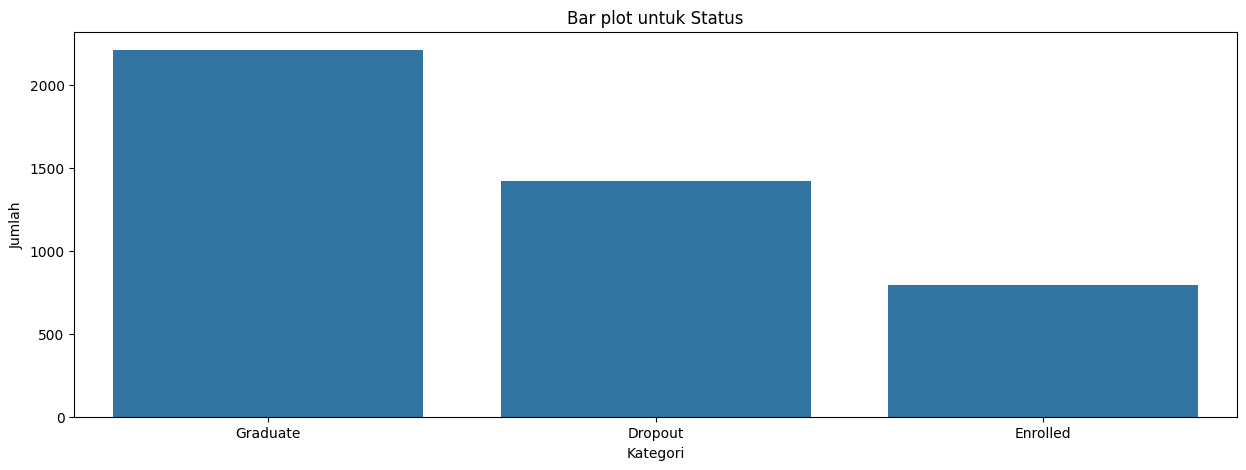

In [8]:
# EDA (Univariate Analysis) - Categorical Features
categorical_cols = df.select_dtypes(include=['object']).columns
for feature in categorical_cols:
    # Menghitung jumlah dan persentase setiap kategori
    count = df[feature].value_counts()
    percent = df[feature].value_counts(normalize=True) * 100

    # Membuat DataFrame untuk menampilkan statistik
    stats_df = pd.DataFrame({'Jumlah Sampel': count, 'Persentase': percent.round(1)})

    # Menampilkan statistik
    print(f"Statistik untuk fitur {feature}:\n{stats_df}")

    # Visualisasi dengan bar plot
    plt.figure(figsize=(15, 5))
    sns.barplot(x=count.index, y=count.values)
    plt.title(f'Bar plot untuk {feature}')
    plt.xlabel('Kategori')
    plt.ylabel('Jumlah')

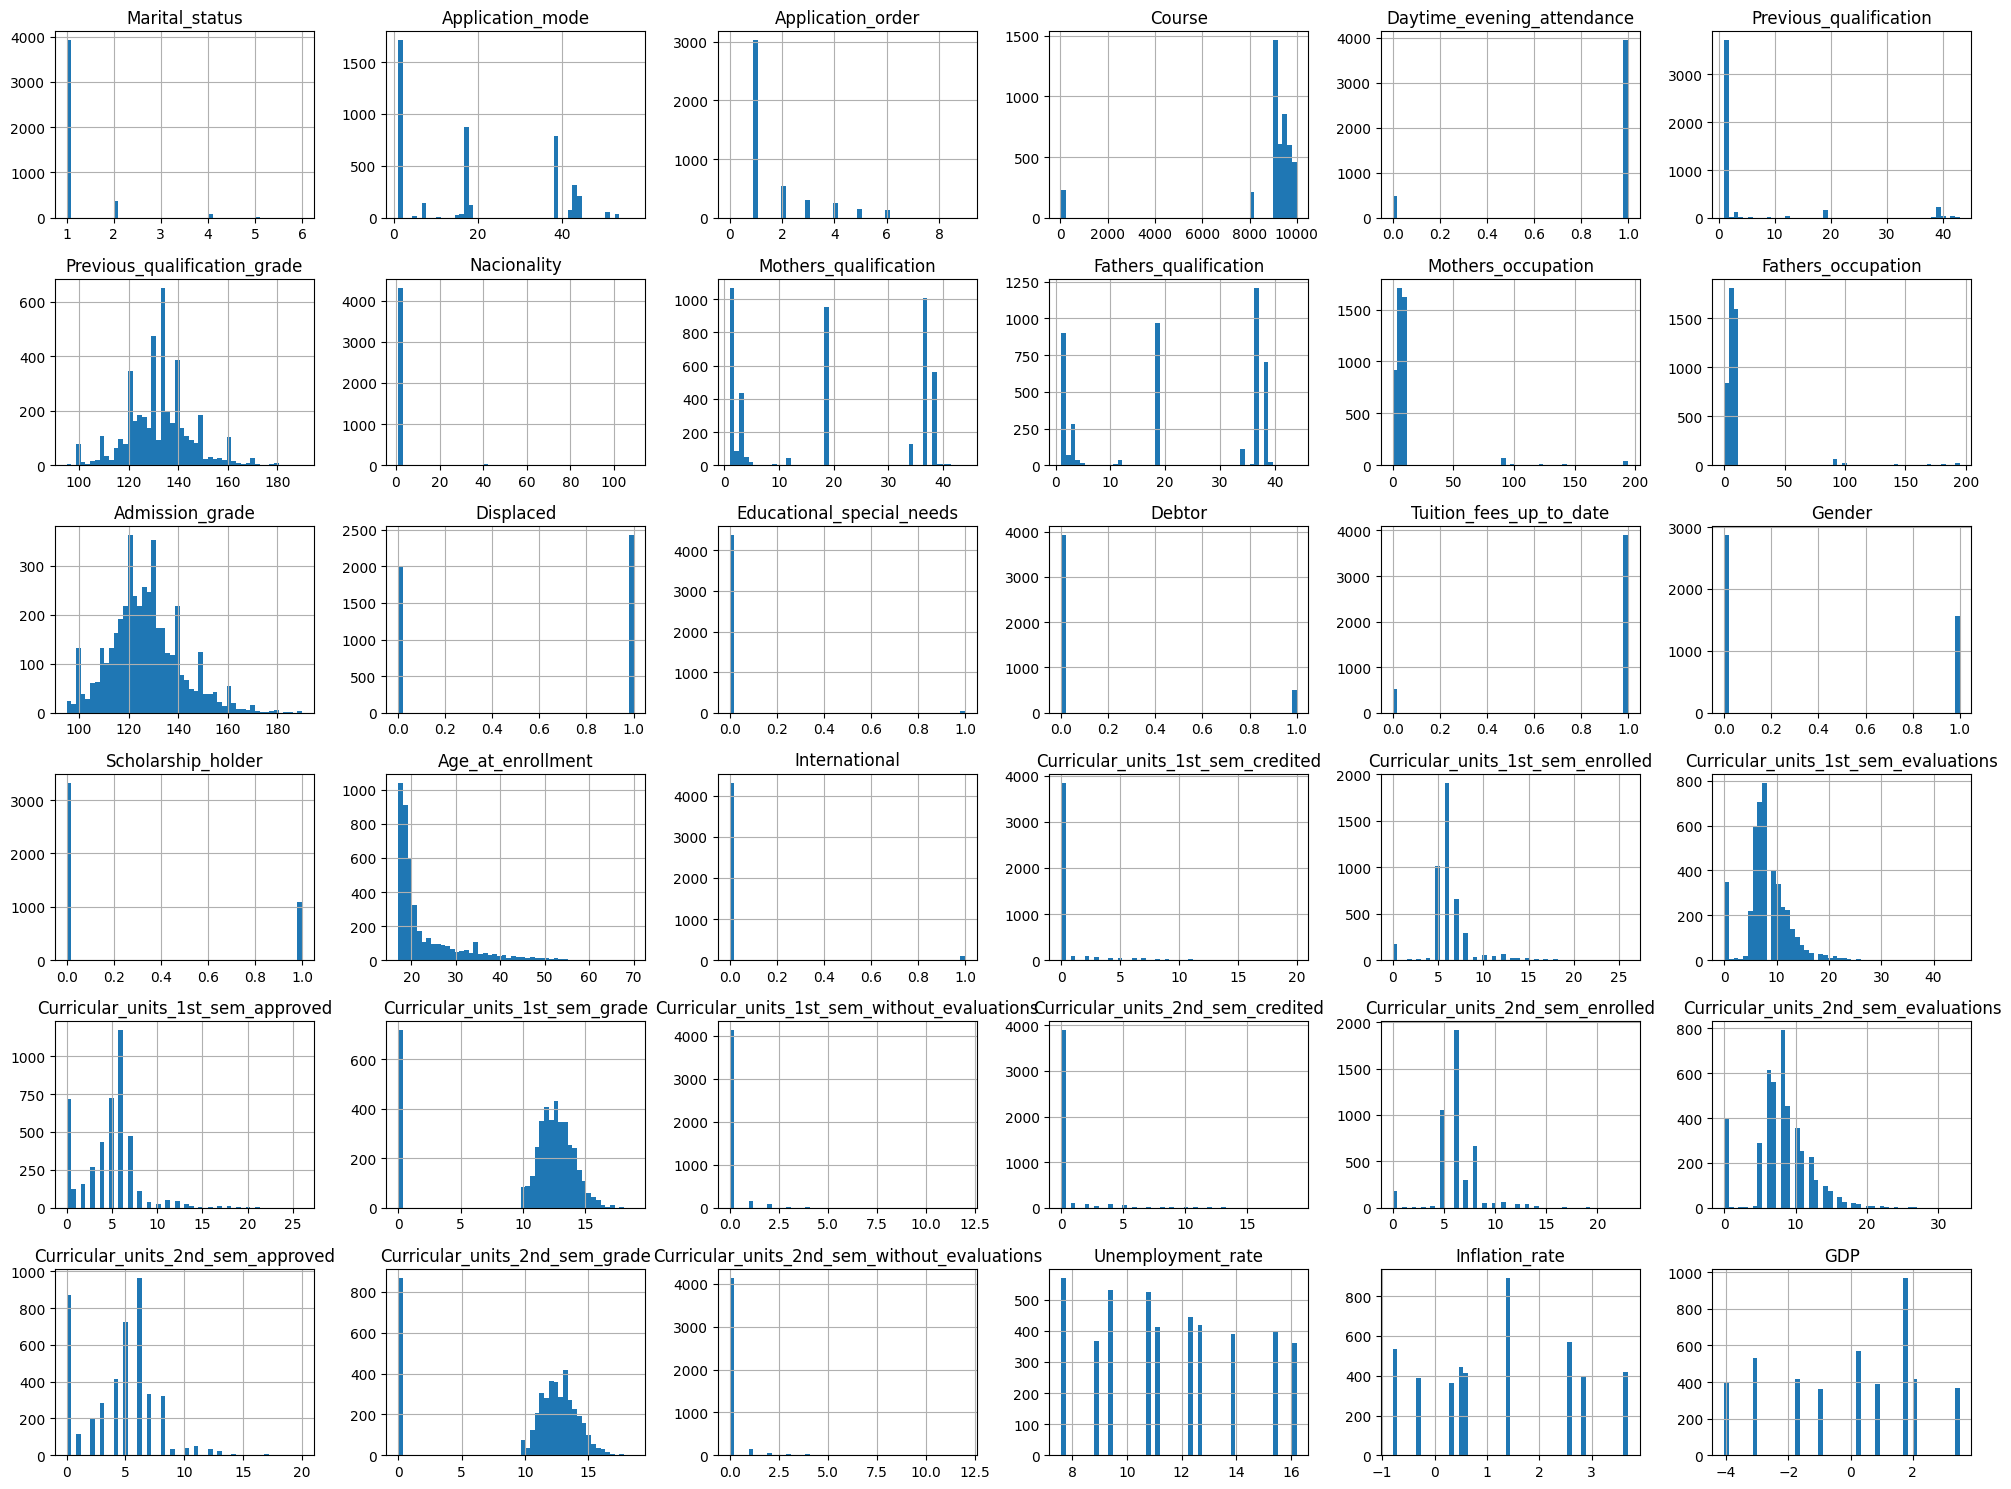

In [9]:
# EDA (Univariate Analysis) - Numerical Features
df.hist(bins=50, figsize=(20, 15))
plt.tight_layout()
plt.show()

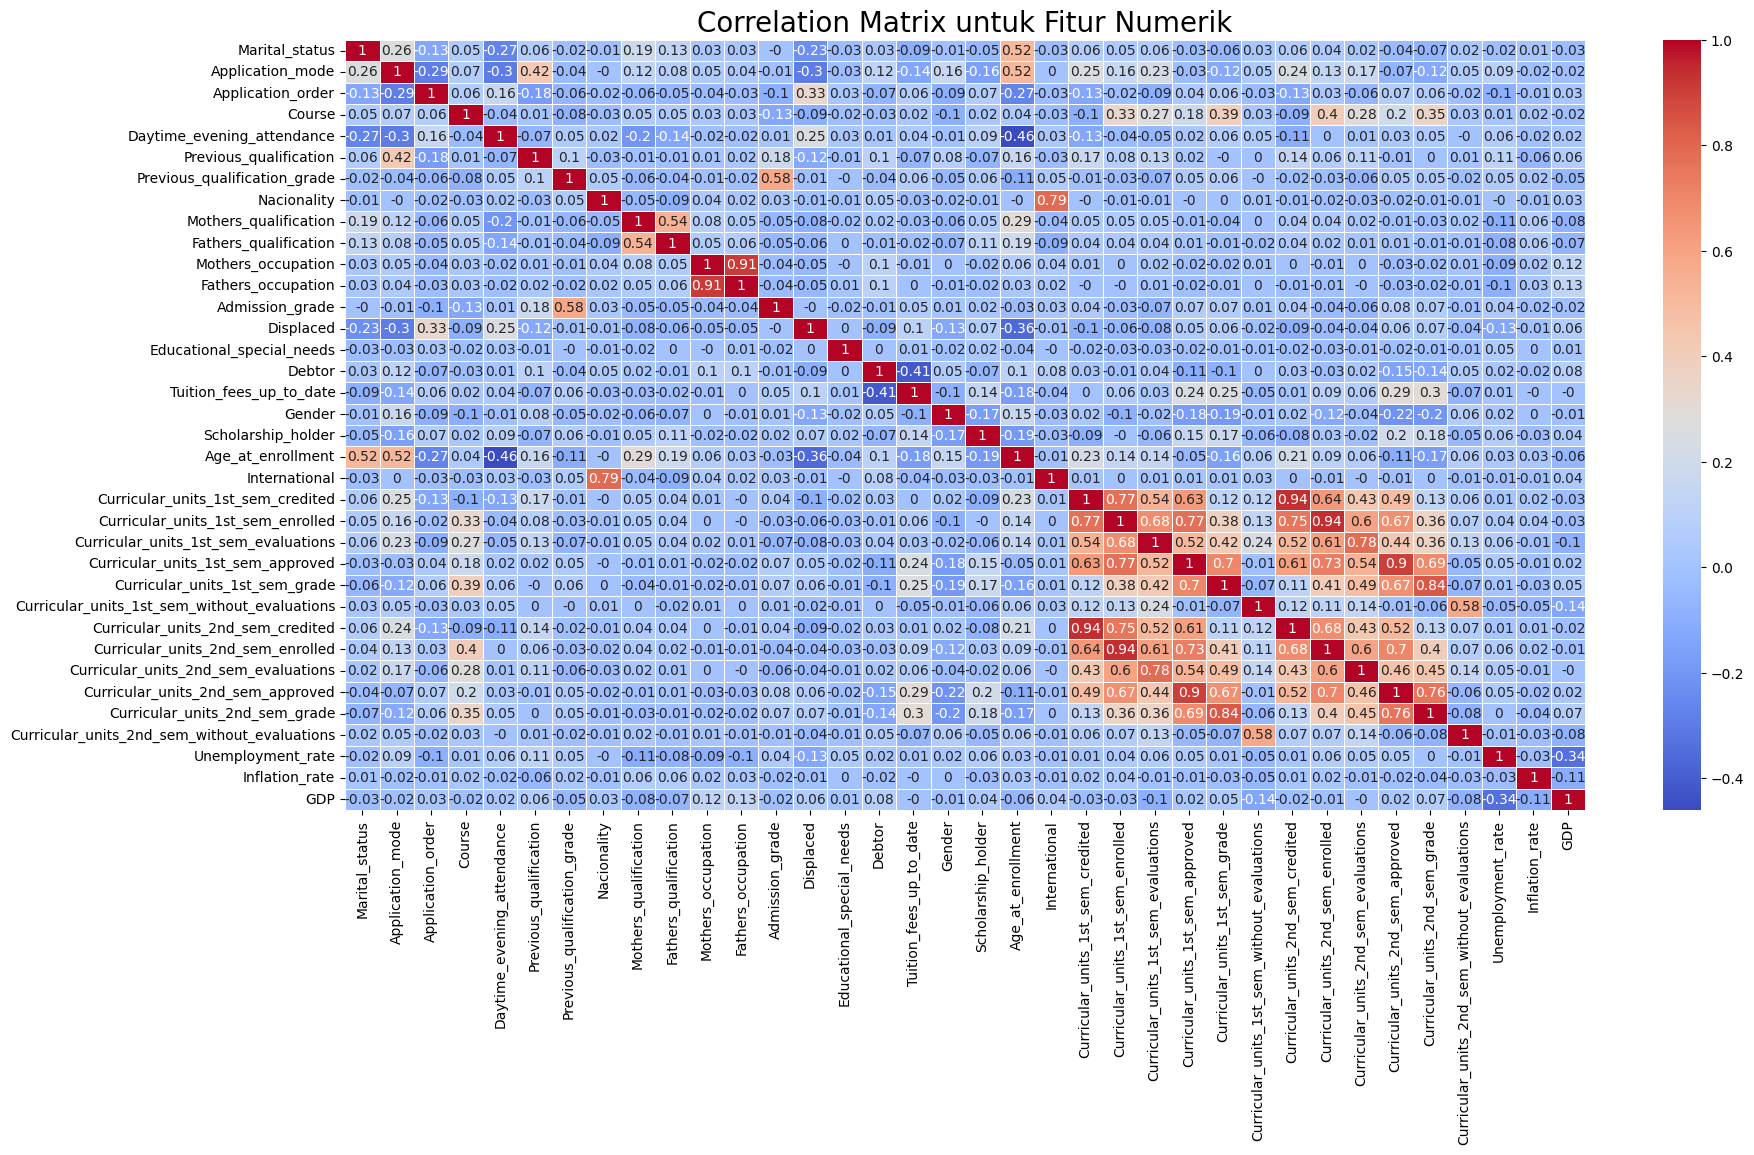

In [10]:
# EDA (Multivariate Analysis) - Numerical Features

# Seleksi hanya kolom numerik
numeric_features = df.select_dtypes(include=['number'])

# Hitung correlation matrix hanya untuk data numerik
correlation_matrix = numeric_features.corr().round(2)

# Plot heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix untuk Fitur Numerik", size=20)
plt.show()

## Data Preparation / Preprocessing

In [11]:
# Feature Engineering
df['approval_ratio'] = (df['Curricular_units_1st_sem_approved'] + df['Curricular_units_2nd_sem_approved']) / (df['Curricular_units_1st_sem_enrolled'] + df['Curricular_units_2nd_sem_enrolled'] + 1e-5)
df['avg_grade_all_sem'] = (df['Curricular_units_1st_sem_grade'] + df['Curricular_units_2nd_sem_grade']) / 2

# Membuat kolom target baru bernama 'Dropout' yang bernilai 1 jika statusnya adalah 'Dropout', dan 0 jika tidak.
df['Dropout'] = df['Status'].apply(lambda x: 1 if x == 'Dropout' else 0)

# Menghapus kolom 'Status' asli karena sudah dikonversi menjadi format numerik biner dalam kolom 'Dropout'.
df.drop(columns=['Status'], inplace=True)

In [12]:
# Tinjau ulang jumlah baris dan kolom dalam dataset
print(f"Jumlah baris: {df.shape[0]}, Jumlah kolom: {df.shape[1]}")

Jumlah baris: 4424, Jumlah kolom: 39


In [13]:
# Mengecek kembali informasi struktur dataframe, termasuk jumlah baris, tipe data, dan jumlah nilai non-null per kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 39 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [14]:
# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['Dropout'])
y = df['Dropout']

# Menampilkan 5 baris pertama X
X.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,approval_ratio,avg_grade_all_sem
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,0.000000,0.000000
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0.999999,13.833333
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,0.000000,0.000000
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0.916666,12.914286
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0.916666,12.666667


In [15]:
# Buat instance StandardScaler
scaler = StandardScaler()

# Normalisasi semua kolom numerik
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(3539, 38), y_train=(3539,)
Test set shape: X_test=(885, 38), y_test=(885,)


## Modeling

In [16]:
# Melatih model Random Forest
xgb_model = XGBClassifier(
    use_label_encoder=False,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

# Fit & Predict
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred_xgb, target_names=["Enrolled/Graduate", "Dropout"]))

                   precision    recall  f1-score   support

Enrolled/Graduate       0.85      0.93      0.89       569
          Dropout       0.85      0.71      0.77       316

         accuracy                           0.85       885
        macro avg       0.85      0.82      0.83       885
     weighted avg       0.85      0.85      0.85       885



In [17]:
# Parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
}

# Grid search
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit training
grid_search.fit(X_train, y_train)

# Objek model terbaik dari GridSearch
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 72 candidates, totalling 216 fits


In [18]:
# Menyimpan model yang telah dilatih
joblib.dump(best_model, 'XGBoost.pkl')

# Menyimpan scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

## Evaluation

Evaluasi XGBoost:
Accuracy: 0.86
F1-Score: 0.86
Precision: 0.86
Recall: 0.86
                   precision    recall  f1-score   support

Enrolled/Graduate       0.87      0.93      0.90       569
          Dropout       0.85      0.74      0.79       316

         accuracy                           0.86       885
        macro avg       0.86      0.83      0.84       885
     weighted avg       0.86      0.86      0.86       885

Confusion Matrix - XGBoost:
 [[527  42]
 [ 81 235]]


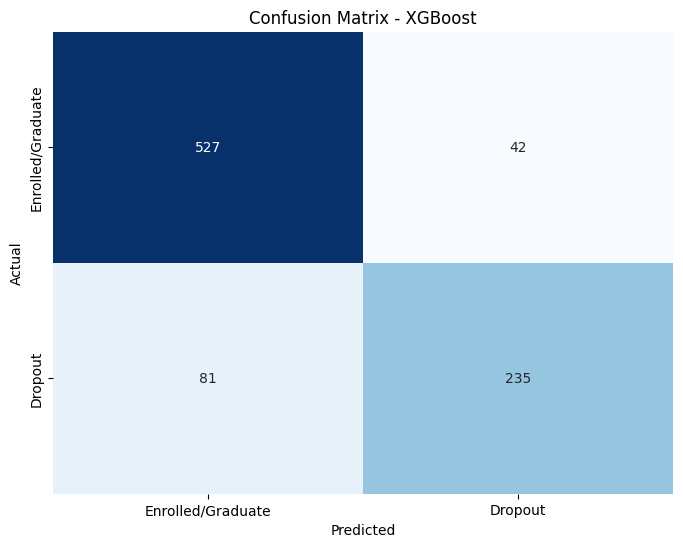

In [19]:
# Predict
y_pred_grid = best_model.predict(X_test)

# Evaluasi model
print("Evaluasi XGBoost:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_grid):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_grid, average='weighted'):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_grid, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_grid, average='weighted'):.2f}")
print(classification_report(y_test, y_pred_grid, target_names=["Enrolled/Graduate", "Dropout"]))

# Cetak confusion matrix
cm_grid = confusion_matrix(y_test, y_pred_grid)
print("Confusion Matrix - XGBoost:\n", cm_grid)

# Visualisasi confusion matrix - XGBoost
plt.figure(figsize=(8, 6))
sns.heatmap(cm_grid, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["Enrolled/Graduate", "Dropout"],
            yticklabels=["Enrolled/Graduate", "Dropout"])
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()